In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import rgb2hex
from matplotlib import colormaps as cm
import matplotlib.colors 

sns.set(style="darkgrid")
cmap2 = cm.get_cmap('twilight')
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))


In [3]:
ht_df=pd.read_csv("./Advanced-Regression/train (1).csv")
htest = pd.read_csv('./Advanced-Regression/test (1).csv')

In [4]:
# Get the shape ( rows and columns) of the train data 
ht_df.shape

(1460, 81)

In [5]:
# Get the shape ( rows and columns) of test data
htest.shape

(1459, 80)

In [6]:
# Get the Column types
print("{} Numerical columns, {} Categorial columns".format( list(ht_df.select_dtypes(include=[np.number]).shape)[1],
    list(ht_df.select_dtypes(include = ['object']).shape)[1]))

38 Numerical columns, 43 Categorial columns


In [7]:
# Get more information about your dataset
ht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Get statistical analysis of train data
ht_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Get information of test data
htest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
# Get statistical analysis of test data
htest.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:

# Check Missing Values Percentage
df_na=[features for features in ht_df.columns if ht_df[features].isnull().sum()>1]
for f in df_na:
    print(f, np.round(ht_df[f].isnull().mean(), 4),  ' % Missing values\n')

LotFrontage 0.1774  % Missing values

Alley 0.9377  % Missing values

MasVnrType 0.5973  % Missing values

MasVnrArea 0.0055  % Missing values

BsmtQual 0.0253  % Missing values

BsmtCond 0.0253  % Missing values

BsmtExposure 0.026  % Missing values

BsmtFinType1 0.0253  % Missing values

BsmtFinType2 0.026  % Missing values

FireplaceQu 0.4726  % Missing values

GarageType 0.0555  % Missing values

GarageYrBlt 0.0555  % Missing values

GarageFinish 0.0555  % Missing values

GarageQual 0.0555  % Missing values

GarageCond 0.0555  % Missing values

PoolQC 0.9952  % Missing values

Fence 0.8075  % Missing values

MiscFeature 0.963  % Missing values



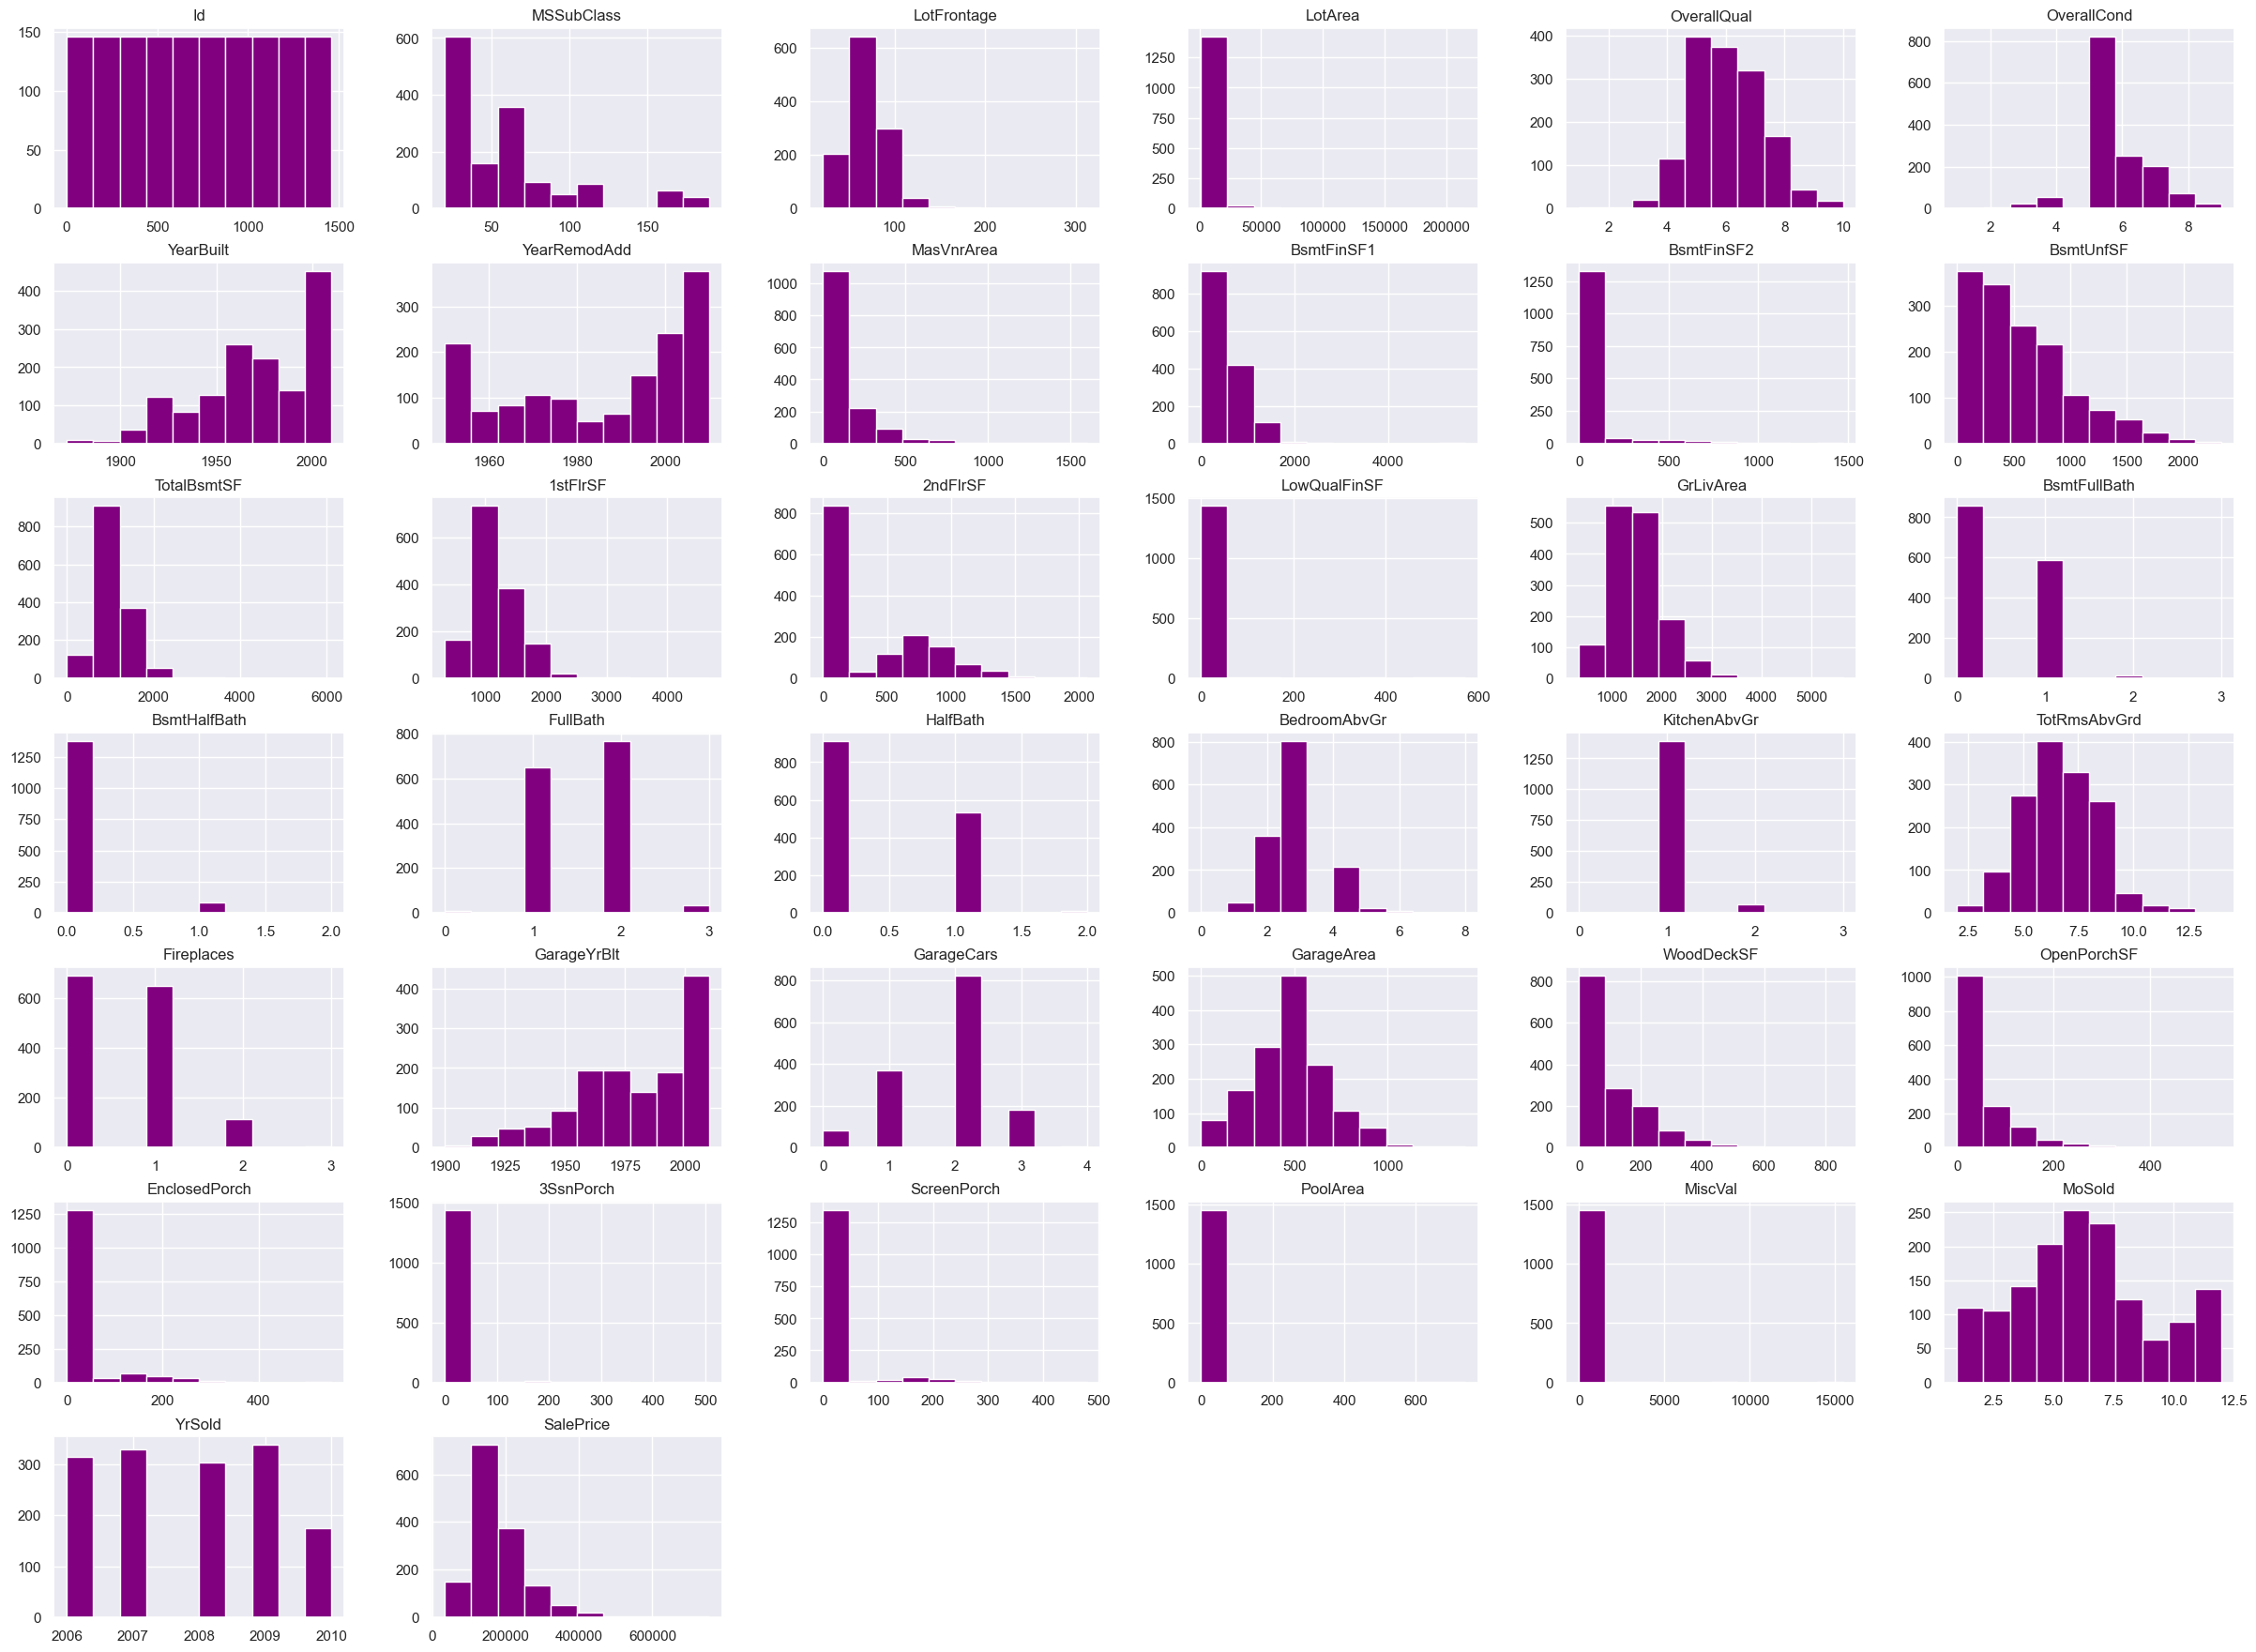

In [12]:
ht_df.hist(figsize=(30,22),color='purple',stacked=True)
plt.show()

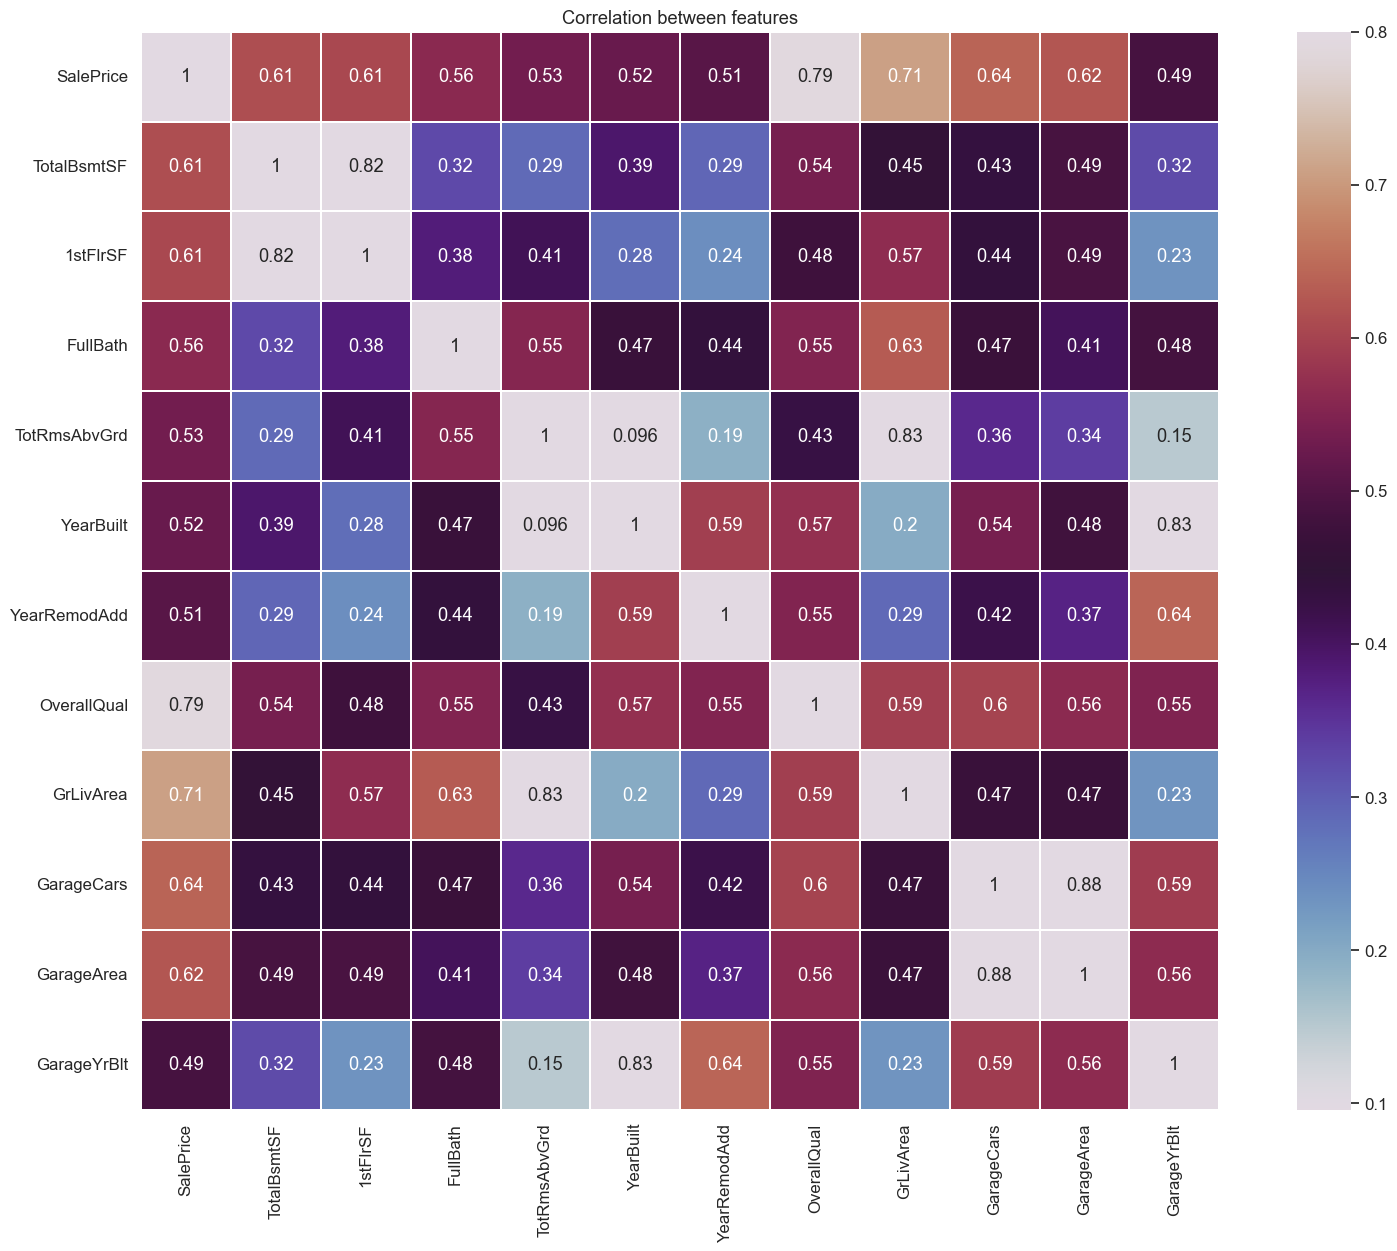

In [13]:


# Build heatmap
sns.set(font_scale=1.10)
plt.figure(figsize=(20, 14))
h_map=ht_df[["SalePrice", "TotalBsmtSF","1stFlrSF","FullBath",
               "TotRmsAbvGrd","YearBuilt","YearRemodAdd","OverallQual","GrLivArea","GarageCars","GarageArea","GarageYrBlt"]].corr(numeric_only=True)
sns.heatmap(h_map, vmax=.8, linewidths=0.02,square=True,annot=True,cmap=cmap2,linecolor="white")
plt.title('Correlation between features')

plt.show()

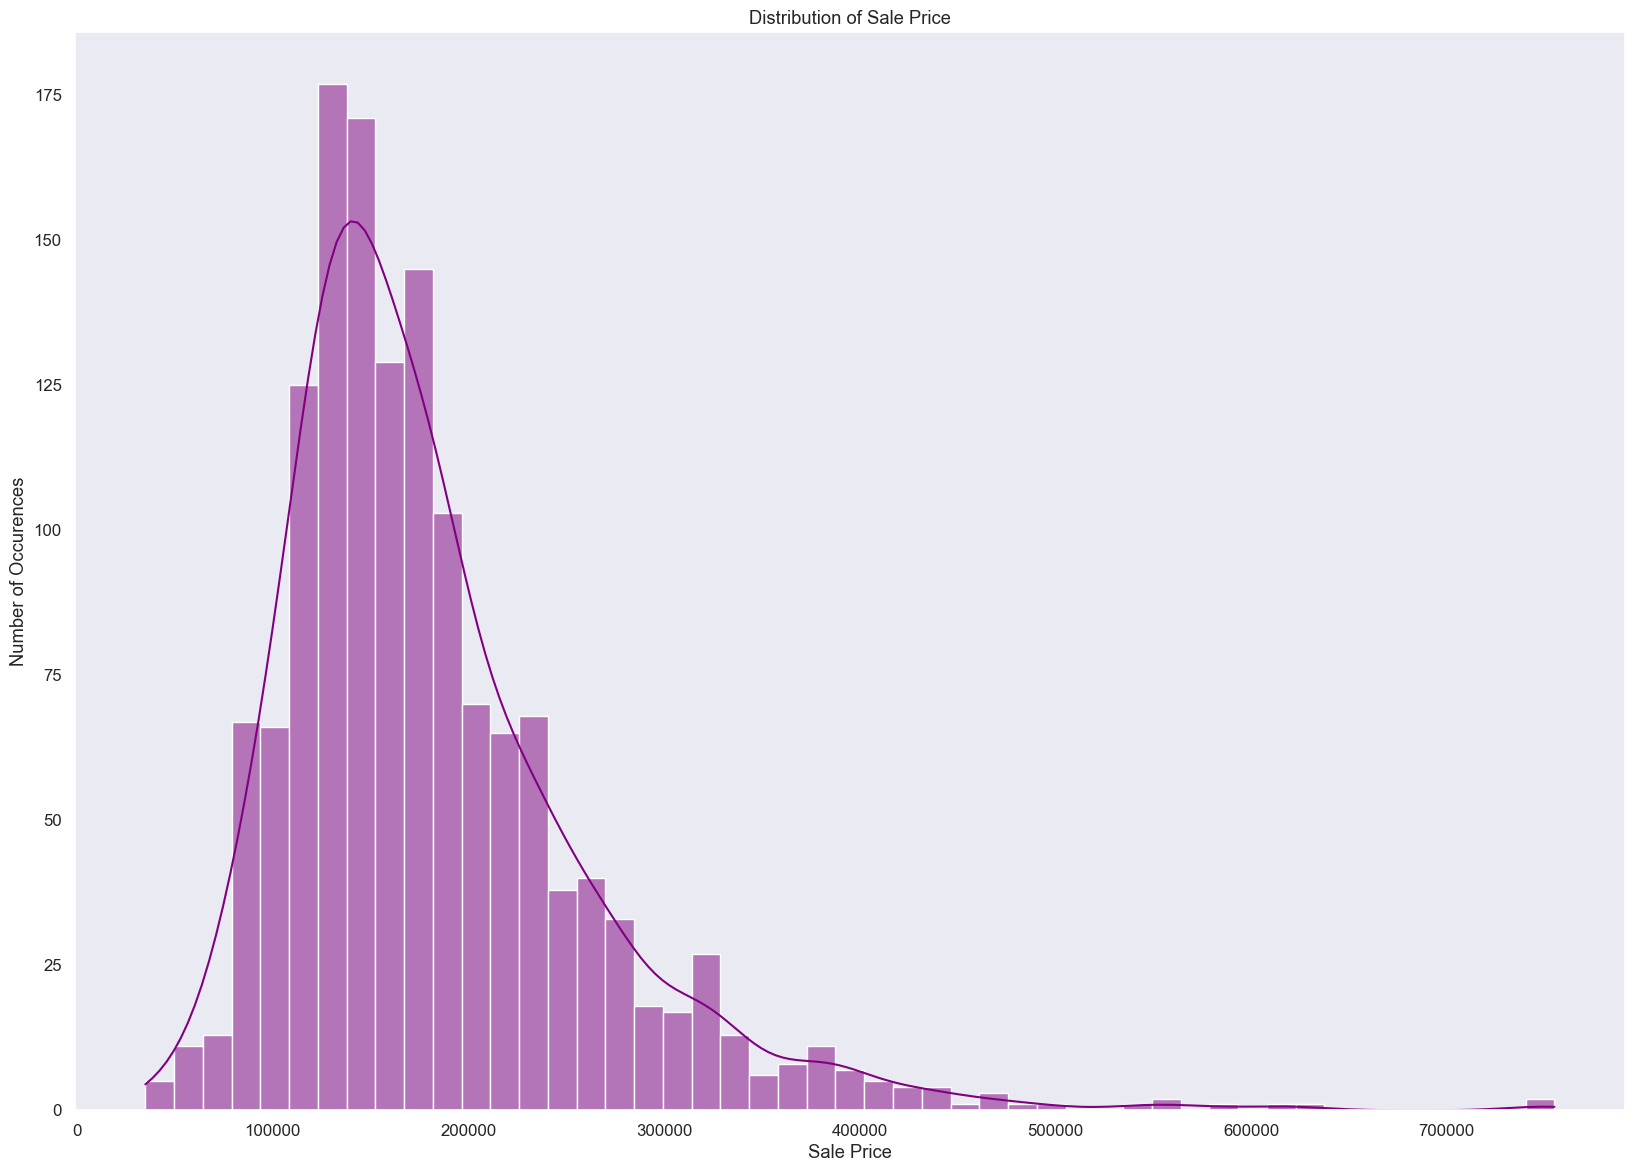

In [14]:
# Sale price distribution
plt.figure(figsize=(20, 14))
sns.histplot(ht_df['SalePrice'], color='purple', kde=True)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")
plt.grid(False)

plt.show()

In [15]:
# Check Skewness and Kurtosis
ht_df['SalePrice'].skew()
ht_df['SalePrice'].kurt()

6.536281860064529

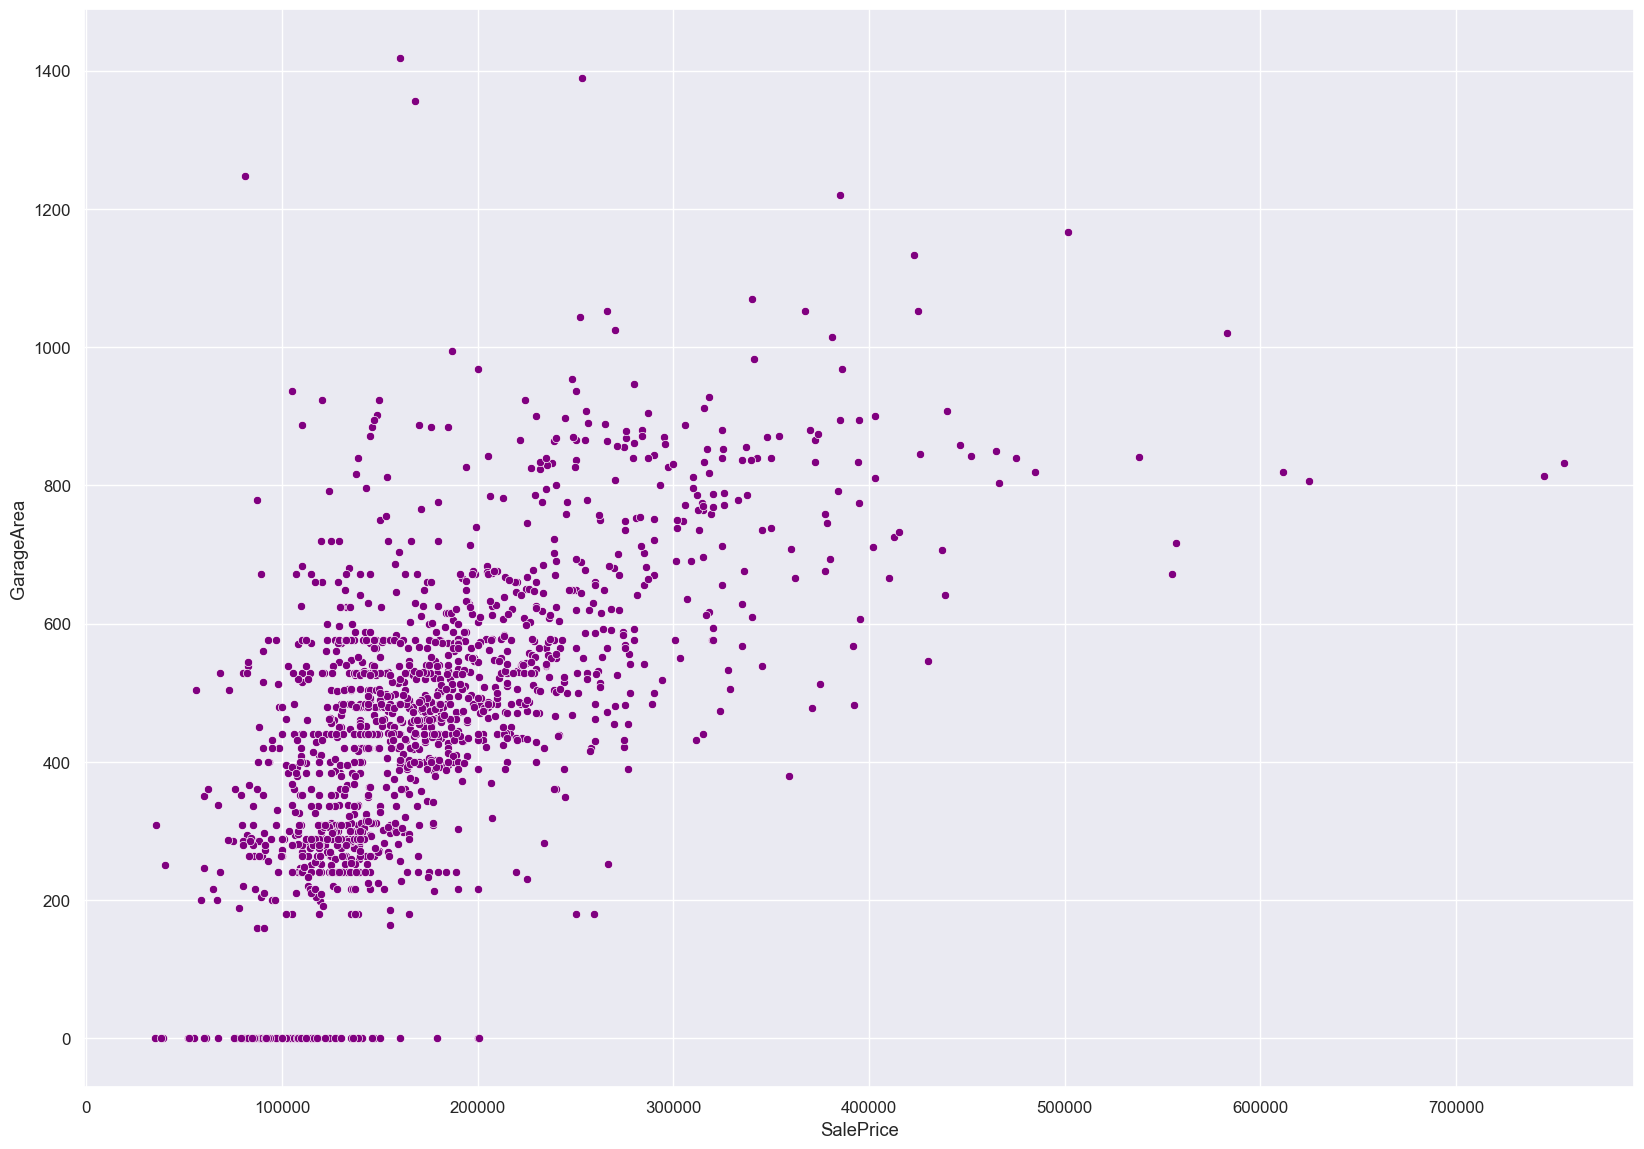

In [16]:
# Sale price vs Garage Area
plt.figure(figsize=(20, 14))
sns.scatterplot(x=ht_df['SalePrice'],y=ht_df['GarageArea'],color='purple')

plt.show()

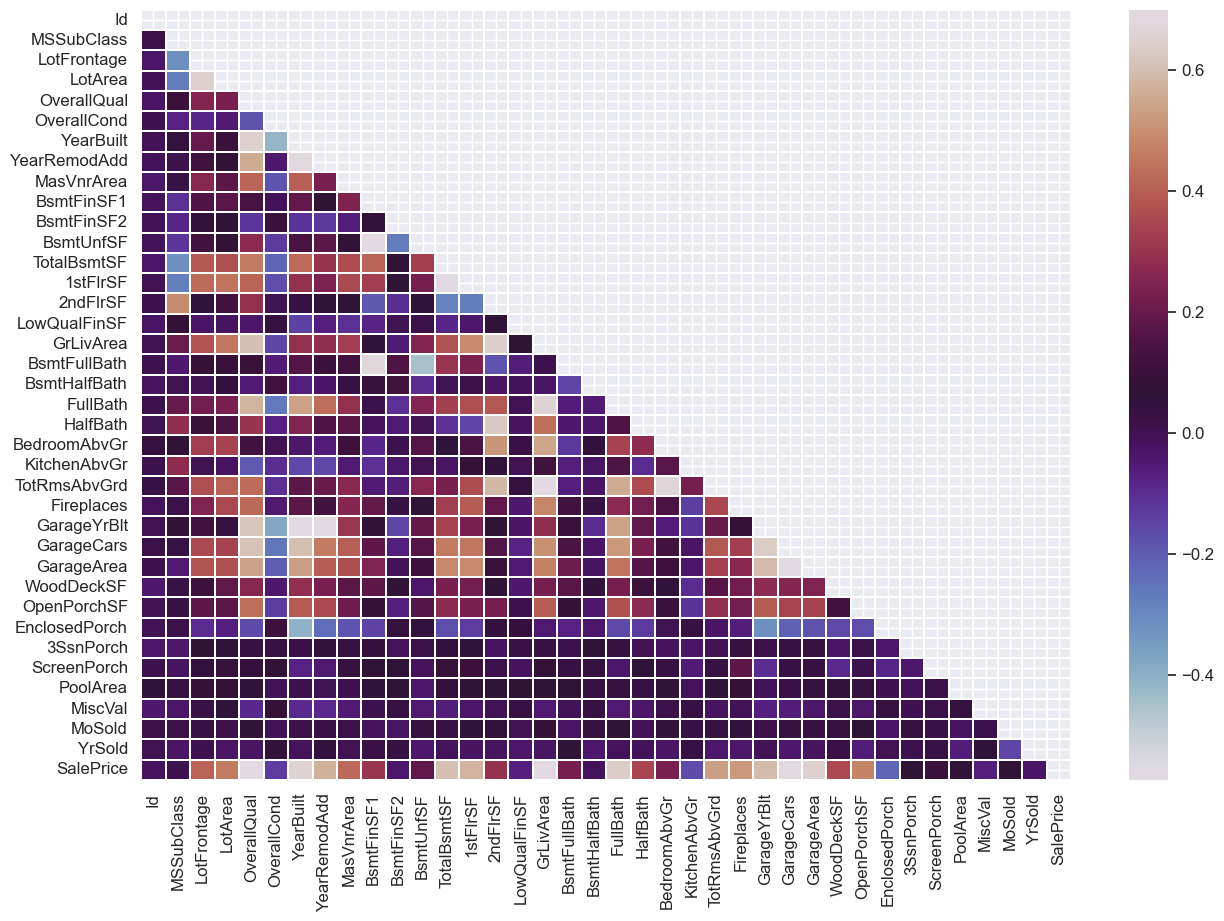

In [17]:
# Calculate correlations
corr = ht_df.corr(method='spearman',numeric_only=True)
m = np.zeros_like(corr)
m[np.triu_indices_from(m)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.7,
            mask=m, 
            fmt='.2f',
            linewidths=.1, cmap=cmap2)

plt.show()

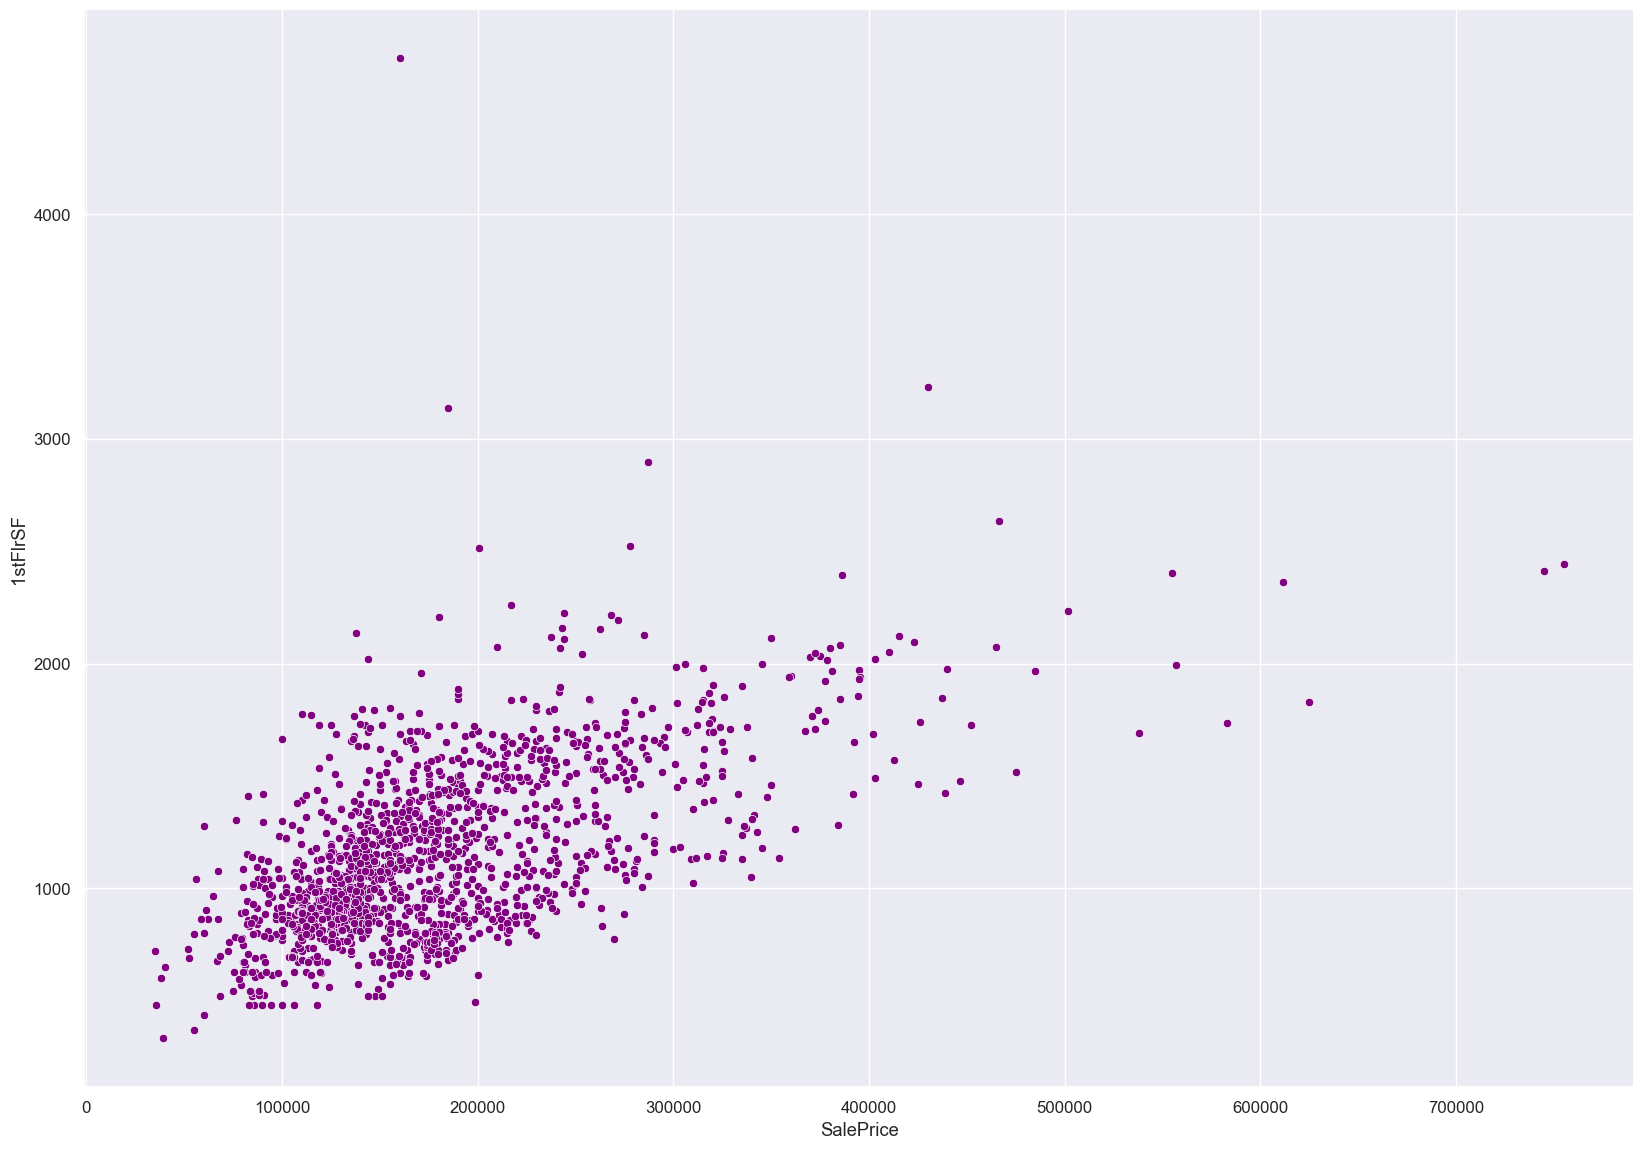

In [18]:
#Sale Price vs 1st Floor SF
plt.figure(figsize=(20, 14))
sns.scatterplot(x=ht_df['SalePrice'],y=ht_df['1stFlrSF'],color='purple')

plt.show()

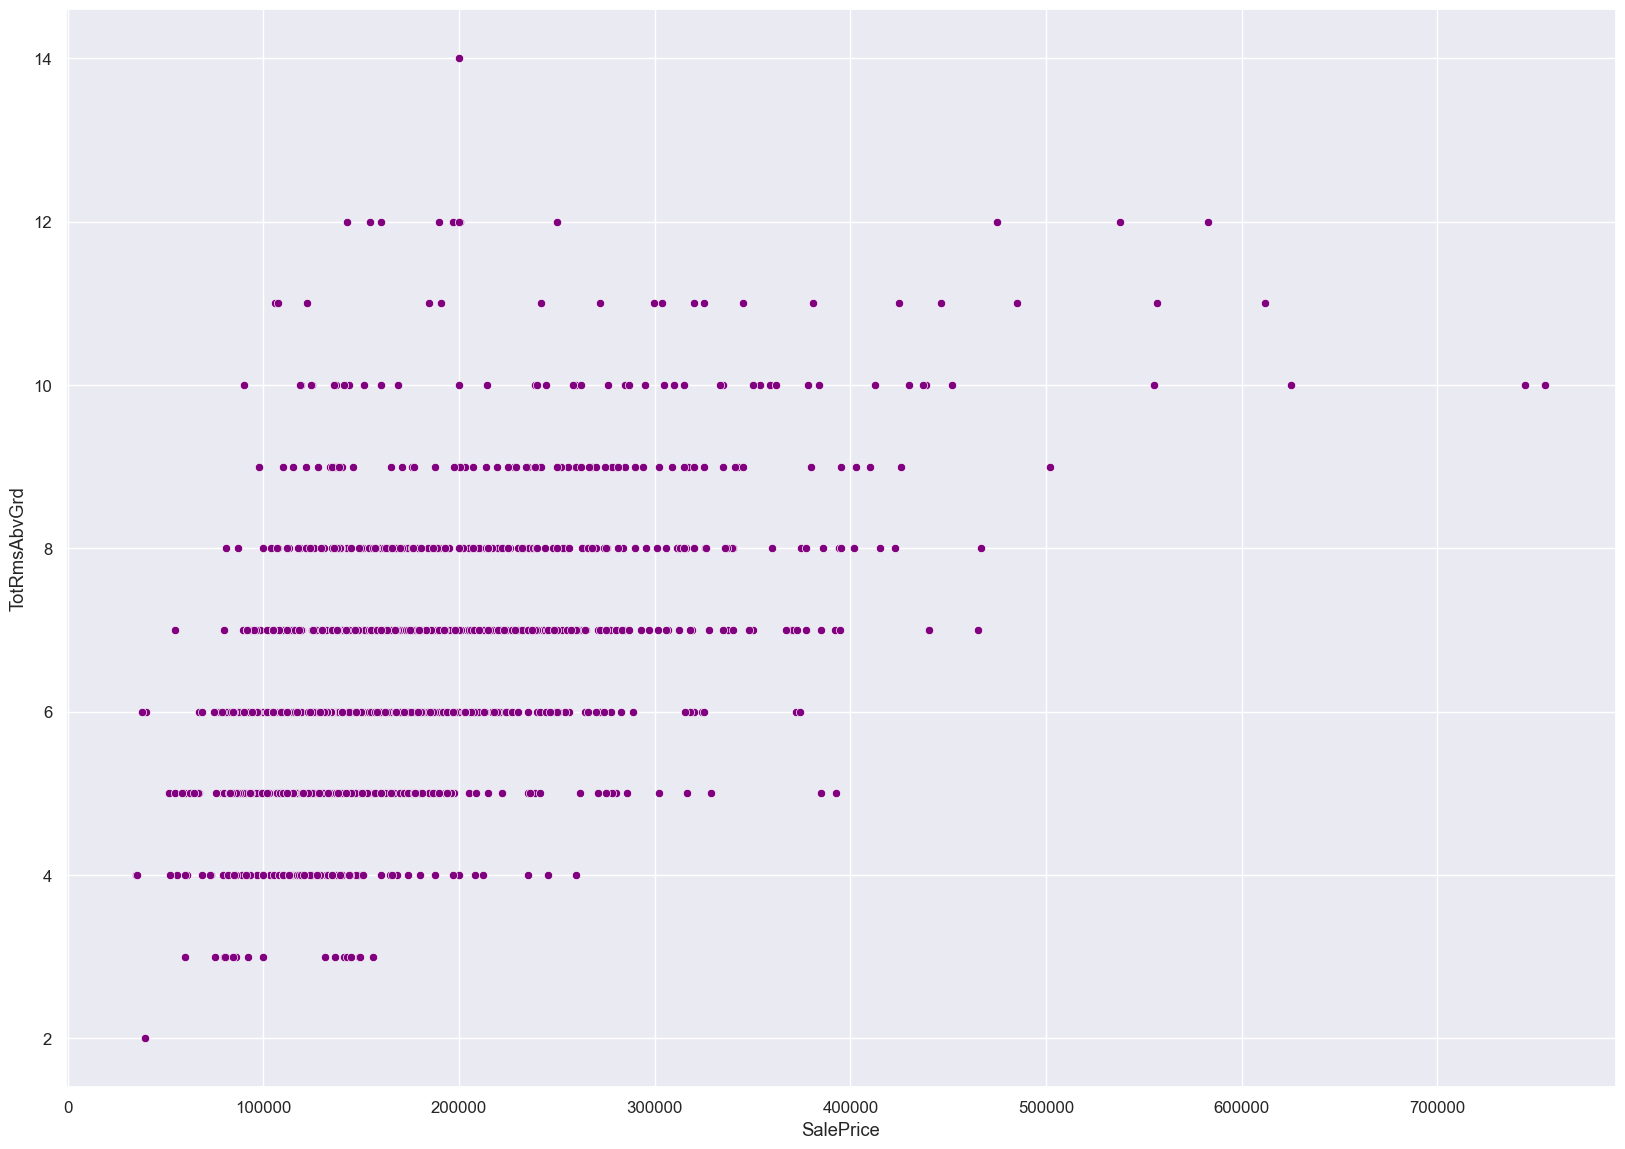

In [19]:
# Salev Price Vs Total Rooms Abv Ground
plt.figure(figsize=(20, 14))
sns.scatterplot(x=ht_df['SalePrice'],y=ht_df['TotRmsAbvGrd'],color='purple')

plt.show()

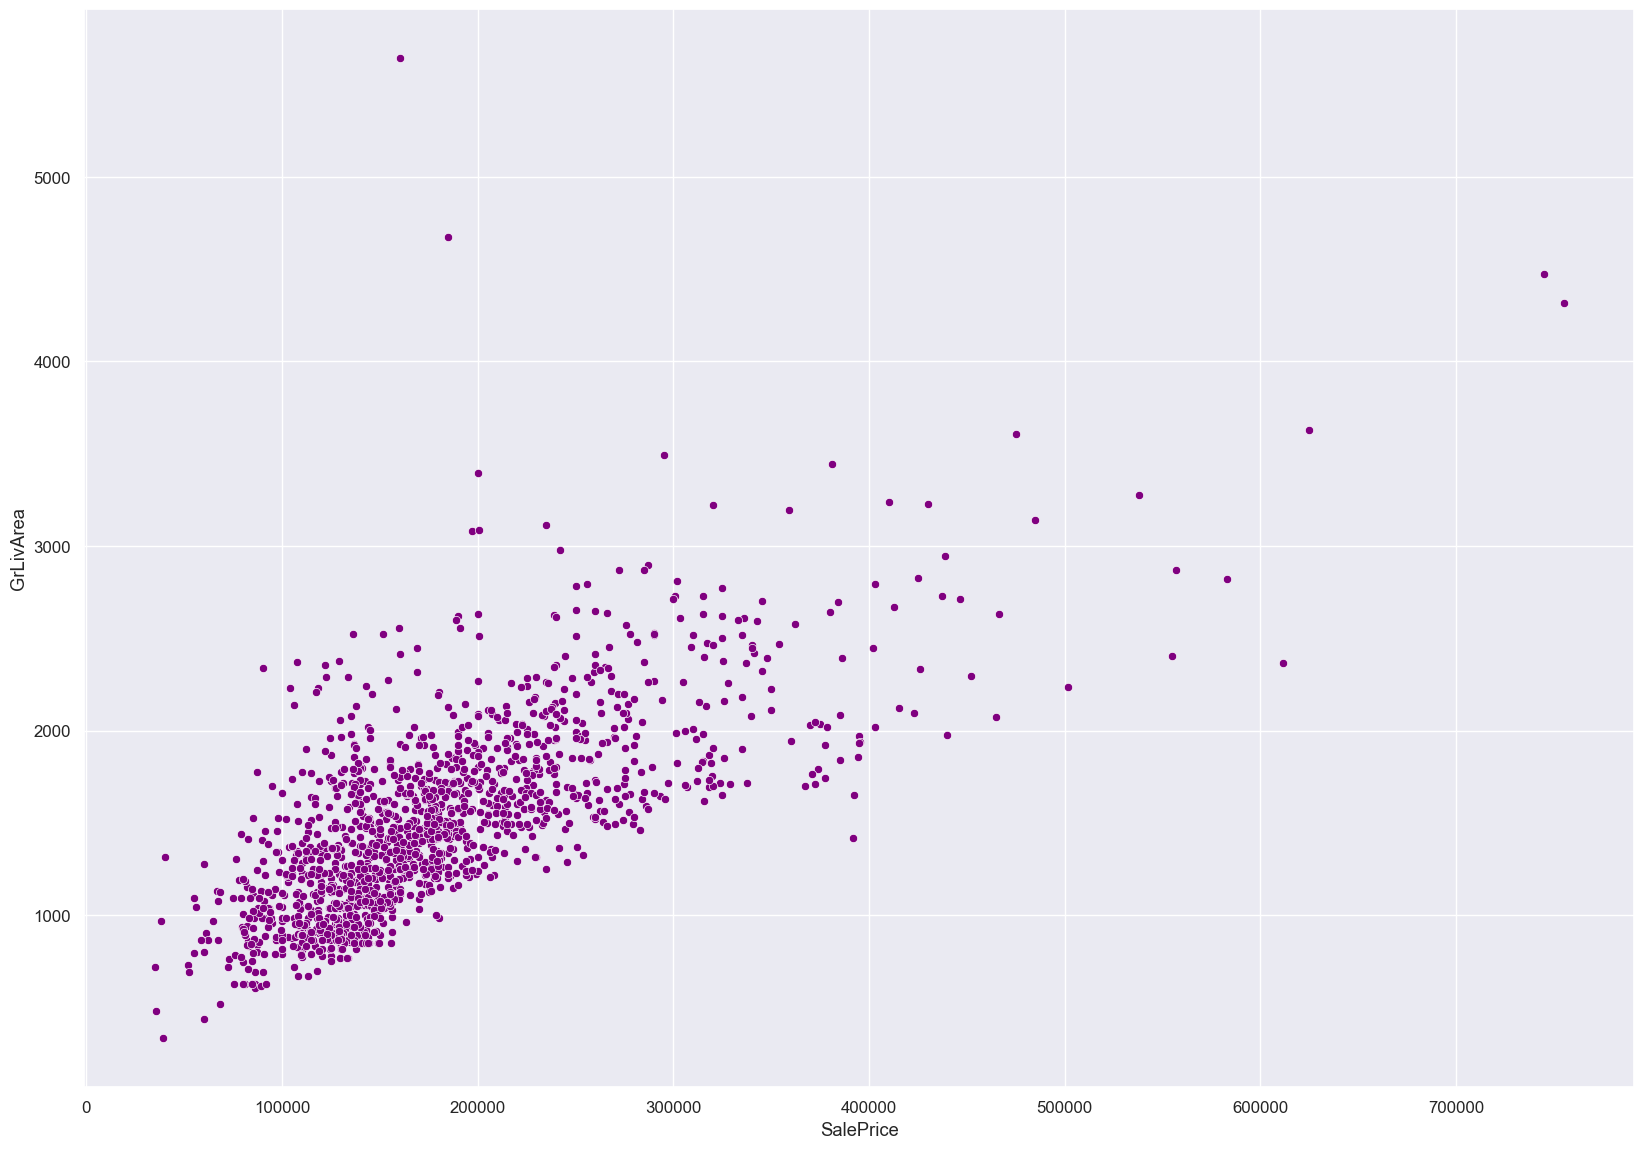

In [20]:
# Sale Price vs GrLivArea
plt.figure(figsize=(20, 14))
sns.scatterplot(x=ht_df['SalePrice'],y=ht_df['GrLivArea'],color='purple')

plt.show()

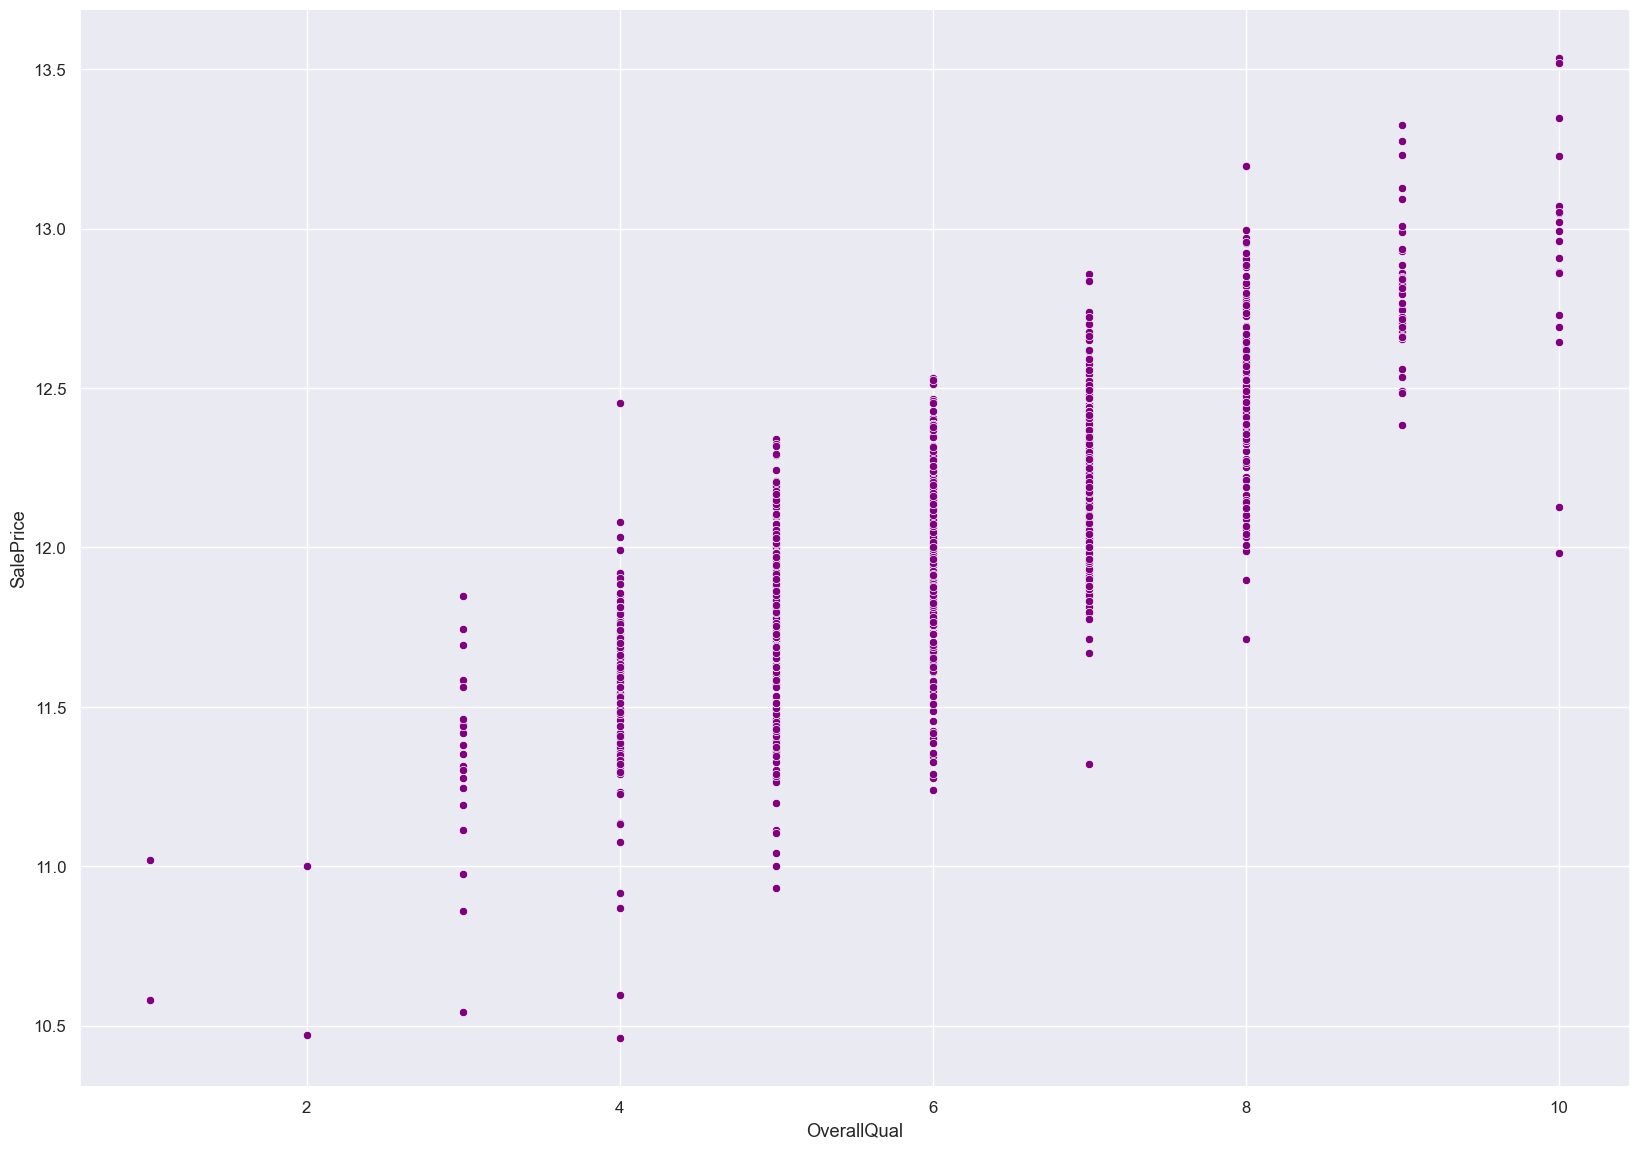

In [21]:
# Sale Price vs OverallQual
plt.figure(figsize=(20, 14))
sns.scatterplot(x=ht_df['OverallQual'],y=np.log(ht_df.SalePrice),color='purple')

plt.show()

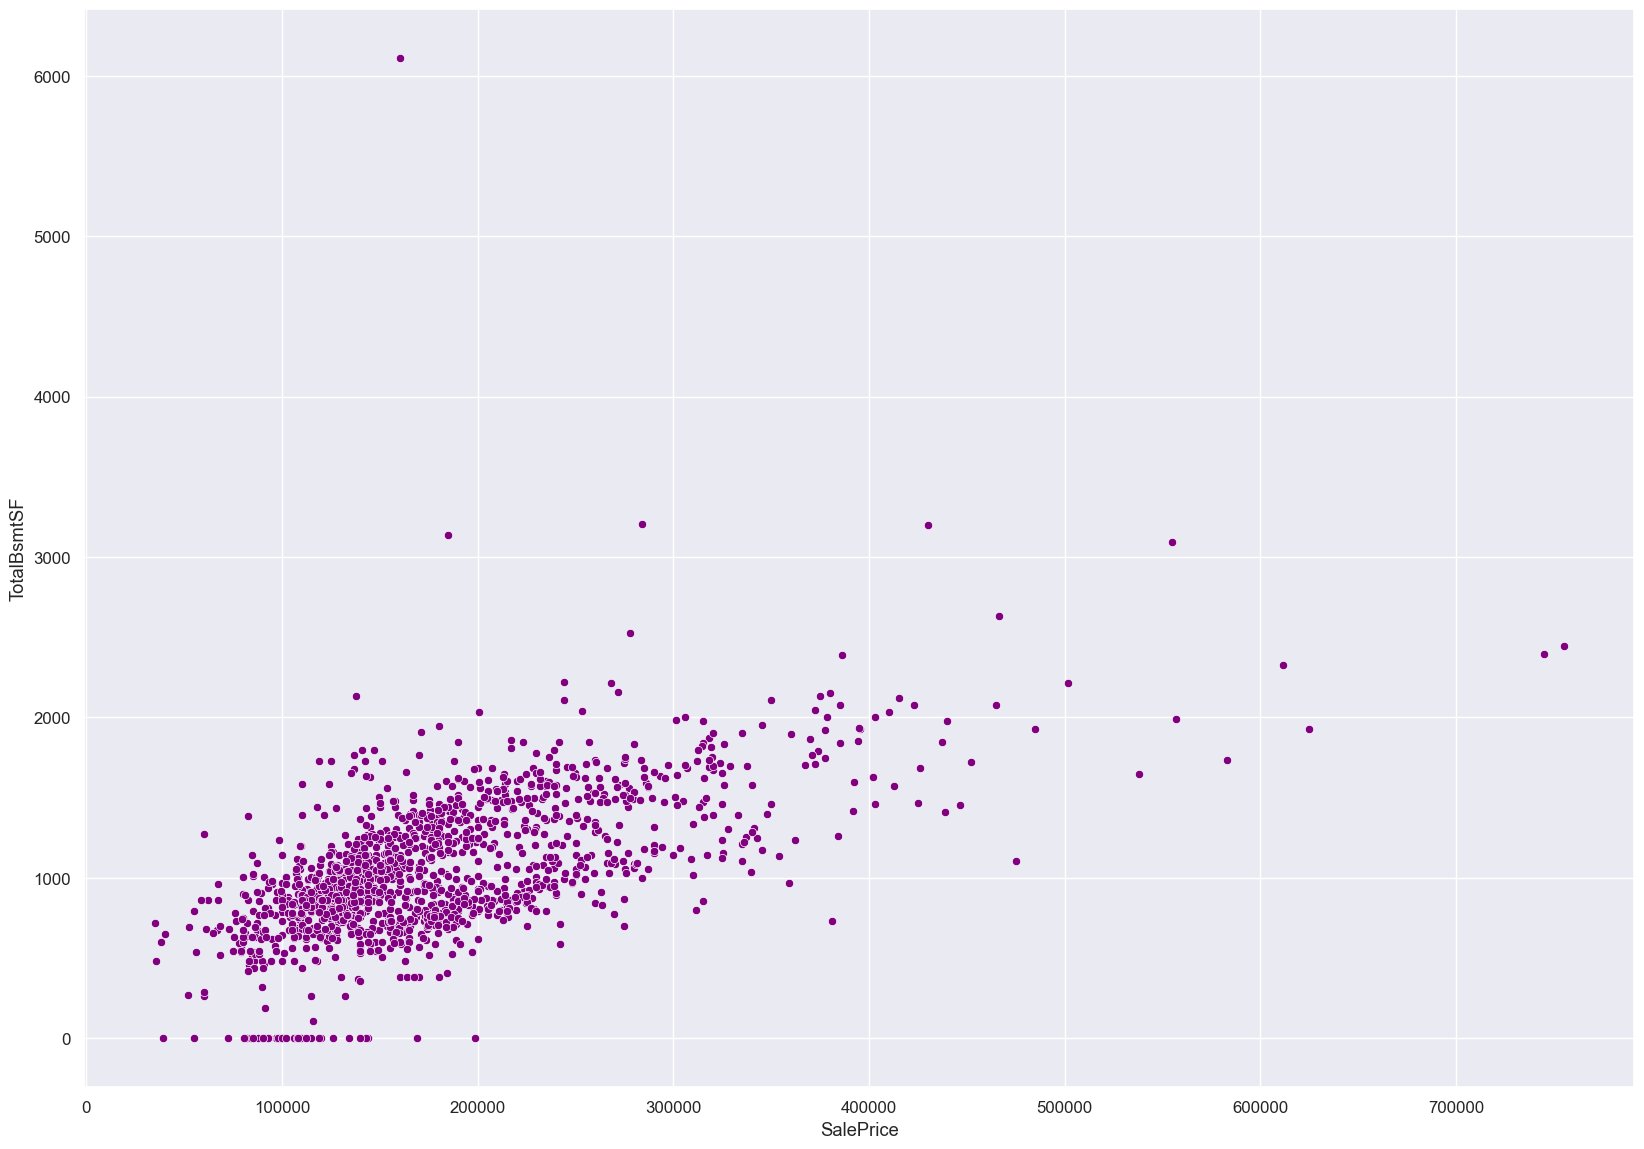

In [22]:
# Saleprice vs Total Bsmt SF
plt.figure(figsize=(20, 14))
sns.scatterplot(x=ht_df['SalePrice'],y=ht_df['TotalBsmtSF'],color='purple')

plt.show()

In [23]:
X = ht_df[["TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd","OverallQual","GrLivArea","GarageCars","GarageArea"]]
y= ht_df['SalePrice']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [27]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=5)
    return pred.mean()
def print_evaluate(t, p):  
    mae = metrics.mean_absolute_error(t, p)
    mse = metrics.mean_squared_error(t, p)
    rmse = np.sqrt(metrics.mean_squared_error(t, p))
    r2_square = metrics.r2_score(t, p)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absoulte Error:', mae)
    print('R2 Square:', r2_square)
    print('-'* 8)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
linear_reg = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linear_reg.fit(X_train,y_train)
test_pred = linear_reg.predict(X_test)
train_pred = linear_reg.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 1443122011.1659107
Root Mean Squared Error: 37988.44575875552
Mean Absoulte Error: 24136.742772186506
R2 Square: 0.7457982125999305
--------
Test set evaluation:
Mean Squared Error: 1515969395.6813364
Root Mean Squared Error: 38935.4516563162
Mean Absoulte Error: 24839.632252832587
R2 Square: 0.7908320198833434
--------


In [33]:
from sklearn.svm import SVR
svm_reg_model = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg_model.fit(X_train, y_train)
test_pred = svm_reg_model.predict(X_test)
train_pred = svm_reg_model.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 337812543.56726617
Root Mean Squared Error: 18379.67746091498
Mean Absoulte Error: 9085.708655968529
R2 Square: 0.9404952930406864
--------
Test set evaluation:
Mean Squared Error: 1186154546.6443853
Root Mean Squared Error: 34440.59445834792
Mean Absoulte Error: 21280.024593740356
R2 Square: 0.8363386811537272
--------


In [34]:

from sklearn.ensemble import RandomForestRegressor
random_reg_model = RandomForestRegressor(n_estimators=1500)
random_reg_model.fit(X_train, y_train)
test_pred = random_reg_model.predict(X_test)
train_pred = random_reg_model.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 157114272.70557907
Root Mean Squared Error: 12534.523234075521
Mean Absoulte Error: 7606.587622669783
R2 Square: 0.9723247732078084
--------
Test set evaluation:
Mean Squared Error: 1003425146.5818954
Root Mean Squared Error: 31676.88663018977
Mean Absoulte Error: 19381.200665729866
R2 Square: 0.8615510235848365
--------


In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg_model = SGDRegressor(n_iter_no_change=150, penalty=None, eta0=0.0001, max_iter=9000, tol=1e-3)
sgd_reg_model.fit(X_train, y_train)
test_pred = sgd_reg_model.predict(X_test)
train_pred = sgd_reg_model.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 1443329196.1502378
Root Mean Squared Error: 37991.17260825517
Mean Absoulte Error: 24128.11285080013
R2 Square: 0.7457617175614439
--------
Test set evaluation:
Mean Squared Error: 1516700462.2100933
Root Mean Squared Error: 38944.83871079829
Mean Absoulte Error: 24782.589071923052
R2 Square: 0.7907311499650017
--------


c:\App\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [37]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elastic_model.fit(X_train, y_train)
test_pred = elastic_model.predict(X_test)
train_pred = elastic_model.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 1443387568.7624135
Root Mean Squared Error: 37991.940839636154
Mean Absoulte Error: 24095.56691304798
R2 Square: 0.7457514353938687
--------
Test set evaluation:
Mean Squared Error: 1519367069.6515937
Root Mean Squared Error: 38979.05937361231
Mean Absoulte Error: 24764.107436824193
R2 Square: 0.7903632211045037
--------


In [38]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1, 
              precompute=True, 
              selection='random',
              random_state=42)
lasso_model.fit(X_train, y_train)
test_pred = lasso_model.predict(X_test)
train_pred = lasso_model.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 1443122011.272643
Root Mean Squared Error: 37988.44576016033
Mean Absoulte Error: 24136.7401513744
R2 Square: 0.74579821258113
--------
Test set evaluation:
Mean Squared Error: 1515971336.513541
Root Mean Squared Error: 38935.47658002328
Mean Absoulte Error: 24839.60808190982
R2 Square: 0.790831752094328
--------


In [39]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0, solver='cholesky', tol=0.0005, random_state=42)
ridge_model.fit(X_train, y_train)
pred = ridge_model.predict(X_test)
test_pred = ridge_model.predict(X_test)
train_pred = ridge_model.predict(X_train)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)
print('Test set evaluation:')
print_evaluate(y_test, test_pred)

Train set evaluation:
Mean Squared Error: 1443125805.7719235
Root Mean Squared Error: 37988.495702935164
Mean Absoulte Error: 24131.603973071877
R2 Square: 0.7457975441910063
--------
Test set evaluation:
Mean Squared Error: 1516333340.3466496
Root Mean Squared Error: 38940.12506845156
Mean Absoulte Error: 24830.20672916762
R2 Square: 0.7907818041133321
--------
